# Permutation analysis

In [1]:
import cptac
import cptac.pancan as pc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import matplotlib.patches as mpatches
import pcprutils as ut

Import CPTAC LUAD dataset

In [2]:
luad = pc.PancanLuad()

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rna_combined = rna_tumor.append(rna_normal)


Get proteomic transcriptomic dataframe and calculate delta correlation value for TP53

In [4]:
trans_norm_df = ut.get_prot_trans_df(luad)
trans_norm_df = trans_norm_df[trans_norm_df.Gene == 'TP53']
original_delta_corr = ut.delta_correlation(trans_norm_df)

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:74: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_corr = df[df[column] == label2].corr(method = 'spearman',min_periods = cutoff ).iloc[0][1]
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tumor_corr = df[df[column] == label1].corr(method = 'spearman',min_periods = cutoff).iloc[0][1]


Plot original scatter plot

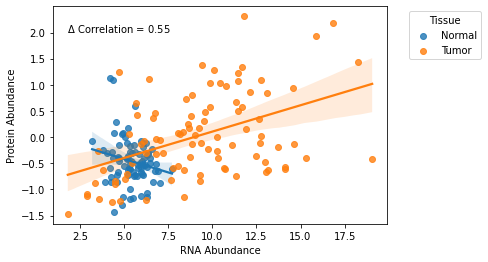

In [5]:
df = trans_norm_df
fig = sns.regplot(y = df[df.Tissue == 'Normal'].Proteomics, x = df[df.Tissue == 'Normal'].Transcriptomics, label= 'Normal')
fig = sns.regplot(y = df[df.Tissue == 'Tumor'].Proteomics, x = df[df.Tissue == 'Tumor'].Transcriptomics,  label = 'Tumor')
plt.legend(title = 'Tissue', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set(xlabel='RNA Abundance', ylabel='Protein Abundance')
# plt.text(-0.1, 1.15, 'A', transform = fig.transAxes, 
#          fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')
plt.text(x = 1.75, y = 2, s = r'$\Delta$' + ' Correlation = ' + str(round(original_delta_corr,2)))
plt.savefig('Figures/Figure_S3A_Original_Correlation_Plot.png', dpi = 600, bbox_inches='tight')
plt.show()

Permute TP53 and plot permuted scatter plots

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:74: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_corr = df[df[column] == label2].corr(method = 'spearman',min_periods = cutoff ).iloc[0][1]
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tumor_corr = df[df[column] == label1].corr(method = 'spearman',min_periods = cutoff).iloc[0][1]
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:74: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a futur

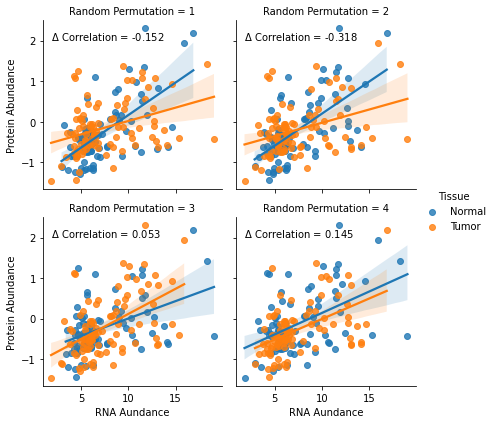

In [6]:
sample_permutation_df = []
for j in range(0,4):
    df = copy.deepcopy(trans_norm_df)
    df['Tissue'] = np.random.permutation(trans_norm_df['Tissue'])
    df['Random Permutation'] = [j+1] * len(df)
    df['delta_corr'] = [round(ut.delta_correlation(df), 3)] * len(df)
    sample_permutation_df.append(df)
    
sample_permutation_df = pd.concat(sample_permutation_df)
global first
first = True
def annotate(data, **kws):
    global first
    if first == True:
        ax = plt.gca()
#         ax.text(-0.1, 1.15, 'B', transform = ax.transAxes, 
#              fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')
    first = False
global used_axes
used_axes = []
global i 
i = 0
def annotate_delta_corr(delta_corr, **kws):
    ax = plt.gca()
    global i
    if ax not in used_axes:
        used_axes.append(ax)
        corr = delta_corr[i]
        i += 1
        ax.text(x = 1.75, y = 2, s = r'$\Delta$' + ' Correlation = ' + str(round(corr,3)))
correlations = pd.unique(sample_permutation_df.delta_corr) 
fig = sns.FacetGrid(data = sample_permutation_df, col = 'Random Permutation', col_wrap=2, hue = 'Tissue', legend_out = True, hue_order = ['Normal', 'Tumor'])
fig.map_dataframe(annotate)
fig.map_dataframe(sns.regplot, x = 'Transcriptomics', y = 'Proteomics')
fig.map_dataframe(annotate_delta_corr, delta_corr = correlations)
fig.add_legend()
fig.set_axis_labels('RNA Aundance', 'Protein Abundance')
plt.savefig('Figures/Figure_S3B_Permuted_Correlation_Plots', dpi=600, bbox_inches='tight')
plt.show()

Plot comparison between original delta correlation vs permuted delta correlations

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:74: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_corr = df[df[column] == label2].corr(method = 'spearman',min_periods = cutoff ).iloc[0][1]
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/pcprutils/__init__.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tumor_corr = df[df[column] == label1].corr(method = 'spearman',min_periods = cutoff).iloc[0][1]
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future vers

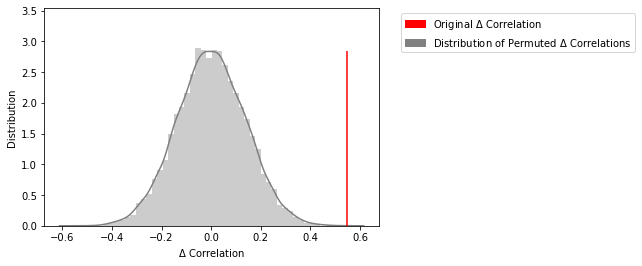

In [7]:
permutation_list = ut.permutate(trans_norm_df, return_perm_list=True)
fig = sns.distplot(permutation_list, color = 'grey')
#plt.show()
maxx = (max(fig.get_lines()[0].get_data()[1]))
plt.vlines(original_delta_corr, 0, maxx, color = 'red')
#fig= plt.plot([original_delta_corr, original_delta_corr], [0, maxx], color = "red")
red_patch = mpatches.Patch(color='red', label='Original '  + r'$\Delta$' +  ' Correlation')
grey_patch = mpatches.Patch(color='grey', label='Distribution of Permuted ' + r'$\Delta$' +  ' Correlations')
plt.ylim([0,maxx+.7])
plt.legend(handles=[red_patch,grey_patch], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(r'$\Delta$' + ' Correlation')
plt.ylabel('Distribution')
# plt.text(-0.1, 1.15, 'C', transform = fig.transAxes, 
#          fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')

plt.savefig('Figures/Figure_S3C_Permutation_Histogram',dpi=600, bbox_inches='tight')
plt.show()